# Wybory do Sejmu i Senatu 2019 - analiza

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style 


In [2]:
df = pd.read_csv('obwody_glosowania.csv', sep = ';')
df.head()

,TERYT gminy,Gmina,Powiat,Numer,Mieszkańcy,Wyborcy,Siedziba,Miejscowość,Ulica,Numer posesji,Numer lokalu,Kod pocztowy,Poczta,Typ obwodu,Przystosowany dla niepełnosprawnych,Typ obszaru,Pełna siedziba,Opis granic,Numer okręgu do Sejmu,Numer okręgu do Senatu
0,20101,m. Bolesławiec,bolesławiecki,1,1914,1520,Szkoła Podstawowa Nr 3,Bolesławiec,ul. Ceramiczna,5,NaN,59-700,Bolesławiec,stały,Nie,miasto,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...","Agatowa, Bazaltowa, Bukowa, Ceramiczna 1 - 13 ...",1,1
1,20101,m. Bolesławiec,bolesławiecki,2,1646,1335,Szkoła Podstawowa Nr 3,Bolesławiec,ul. Ceramiczna,5,NaN,59-700,Bolesławiec,stały,Nie,miasto,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...","Astrów, Bławatkowa, Bratków, Czerwonych Maków,...",1,1
2,20101,m. Bolesławiec,bolesławiecki,3,1786,1428,Szkoła Podstawowa Nr 5,Bolesławiec,ul. Dolne Młyny,60,NaN,59-700,Bolesławiec,stały,Tak,miasto,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...","Ceramiczna parzyste 14 - 24a i od 25 do końca,...",1,1
3,20101,m. Bolesławiec,bolesławiecki,4,1820,1431,Szkoła Podstawowa Nr 5,Bolesławiec,ul. Dolne Młyny,60,NaN,59-700,Bolesławiec,stały,Tak,miasto,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...","Akacjowa, Brzozowa, Elizy Orzeszkowej, Góralsk...",1,1
4,20101,m. Bolesławiec,bolesławiecki,5,1714,1377,Szkoła Podstawowa Nr 5,Bolesławiec,ul. Dolne Młyny,60,NaN,59-700,Bolesławiec,stały,Tak,miasto,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...","Augusta Cieszkowskiego, Dębowa, Franciszka Sal...",1,1


## Wstępna analiza danych

df.shape

In [3]:
df.columns

Index(['TERYT gminy', 'Gmina', 'Powiat', 'Numer', 'Mieszkańcy', 'Wyborcy',
       'Siedziba', 'Miejscowość', 'Ulica', 'Numer posesji', 'Numer lokalu',
       'Kod pocztowy', 'Poczta', 'Typ obwodu',
       'Przystosowany dla niepełnosprawnych', 'Typ obszaru', 'Pełna siedziba',
       'Opis granic', 'Numer okręgu do Sejmu', 'Numer okręgu do Senatu'],
      dtype='object')

In [4]:
df.dtypes

TERYT gminy                             int64
Gmina                                  object
Powiat                                 object
Numer                                   int64
Mieszkańcy                              int64
Wyborcy                                 int64
Siedziba                               object
Miejscowość                            object
Ulica                                  object
Numer posesji                          object
Numer lokalu                           object
Kod pocztowy                           object
Poczta                                 object
Typ obwodu                             object
Przystosowany dla niepełnosprawnych    object
Typ obszaru                            object
Pełna siedziba                         object
Opis granic                            object
Numer okręgu do Sejmu                   int64
Numer okręgu do Senatu                  int64
dtype: object

## Wyborcy

In [5]:
#liczba wyborców
voters = df['Wyborcy'].sum()
inh = df['Mieszkańcy'].sum()
vot_pr = round(voters/inh * 100, 3)
print('Liczba mieszkańców wynosi: ' + str(inh) + '. W wyborach do Sejmu i Senatu swój głos może oddać ' + str(voters) + ' osób, co stanowi ' + str(vot_pr) + '% obywateli.')



Liczba mieszkańców wynosi: 36910074. W wyborach do Sejmu i Senatu swój głos może oddać 30070603 osób, co stanowi 81.47% obywateli.


In [6]:
# Obwody
n = len(pd.unique(df['Typ obwodu']))
print('Wyróznia się ' + str(n) + ' typów obwodów.')

Wyróznia się 11 typów obwodów.


In [7]:
cir_type = df['Typ obwodu'].value_counts(sort=True)
cir_type

stały                                   25420
zakład leczniczy                          846
dom pomocy społecznej                     641
zagranica                                 314
zakład karny                               94
areszt śledczy                             45
oddział zewnętrzny aresztu śledczego       19
oddział zewnętrzny zakładu karnego         15
dom studencki                               6
statek                                      5
zespół domów studenckich                    4
Name: Typ obwodu, dtype: int64

In [8]:
#wyborcy na statku
ship = df[df['Typ obwodu'] == 'statek']
ship = ship['Wyborcy'].sum()
print('Cheć głosowania na statku wyraziło: ' + str(ship) + ' osób.')

Cheć głosowania na statku wyraziło: 145 osób.


In [9]:
#wyborcy zagraniczni
abroad = df[df['Typ obwodu'] == 'zagranica']
abroad = abroad['Wyborcy'].sum()
print('Cheć głosowania za granicą wyraziło: ' + str(abroad) + ' osób.')
abroad_pr = round(abroad/voters * 100, 2)
print('Jest to ' + str(abroad_pr) + ' % wszystkich głosujących.')


Cheć głosowania za granicą wyraziło: 331028 osób.
Jest to 1.1 % wszystkich głosujących.


In [10]:
abroad_prr = 100 - zagranica_pr
abroad_prr

NameError: name 'zagranica_pr' is not defined

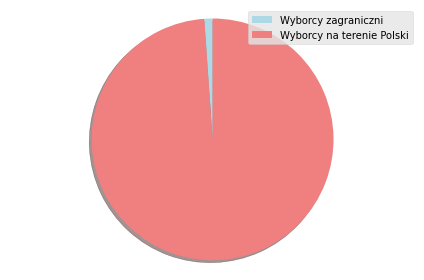

In [44]:
labels = ['Wyborcy zagraniczni', 'Wyborcy na terenie Polski']
sizes = [abroad_pr, abroad_prr]
colors = ['lightblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90 )
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [19]:
#ilość wyborców w danym typie obwodu
typ_obw = pd.pivot_table(df, 'Wyborcy', ['Typ obwodu'], aggfunc=np.sum)
typ_obw


,Wyborcy
Typ obwodu,
areszt śledczy,19937
dom pomocy społecznej,47845
dom studencki,1645
oddział zewnętrzny aresztu śledczego,2388
oddział zewnętrzny zakładu karnego,2015
statek,145
stały,29509141
zagranica,331028
zakład karny,48304


In [20]:
#liczba wyborców w okręgach innych niż stałe
poza_st = typ_obw.drop(typ_obw.index[[6]])
poza_st

,Wyborcy
Typ obwodu,
areszt śledczy,19937
dom pomocy społecznej,47845
dom studencki,1645
oddział zewnętrzny aresztu śledczego,2388
oddział zewnętrzny zakładu karnego,2015
statek,145
zagranica,331028
zakład karny,48304
zakład leczniczy,107779


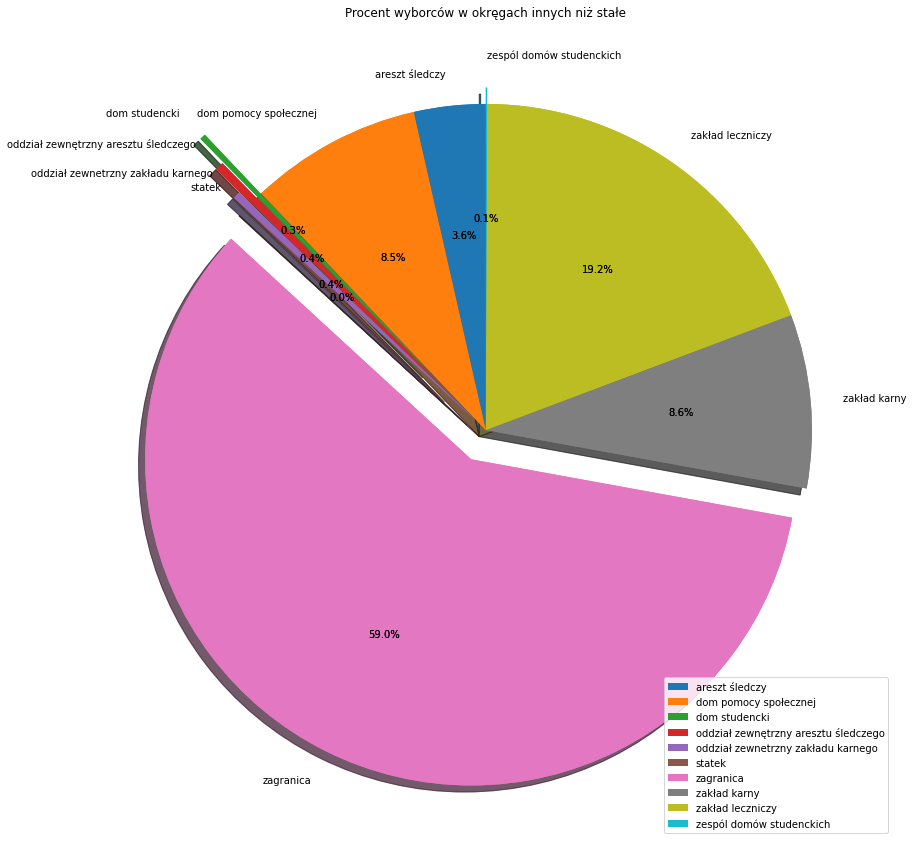

In [21]:
labels = ['areszt śledczy', 'dom pomocy społecznej', 'dom studencki', 'oddział zewnętrzny aresztu śledczego', 'oddział zewnetrzny zakładu karnego', 'statek', 'zagranica', 'zakład karny', 'zakład leczniczy', 'zespól domów studenckich']
sizes = poza_st['Wyborcy']

fig1, ax1 = plt.subplots(figsize =(15,15))
explode = (0, 0, 0.25, 0.15, 0.05, 0, 0.1, 0, 0, 0.05) 
 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.title('Procent wyborców w okręgach innych niż stałe') 
plt.legend(patches, labels, loc='lower right')
plt.show()

## analiza okręgów do sejmu

In [45]:
cir = len(df['Numer okręgu do Sejmu'].unique())
print('Wyróżnia się ' + str(cir) + ' okręgów do Sejmu.')

Wyróżnia się 41 okręgów do Sejmu.


In [46]:
#Wyborcy w danym okręgu (sejm)
cir_vot=df[['Wyborcy','Numer okręgu do Sejmu']].groupby(['Numer okręgu do Sejmu']).sum()
cir_vot.head()


,Wyborcy
Numer okręgu do Sejmu,
1,752171
2,509179
3,993744
4,776937
5,806830


In [47]:
cir_vot.describe()

,Wyborcy
count,4.100000e+01
mean,7.334293e+05
std,2.184439e+05
min,4.689260e+05
25%,5.797660e+05
50%,7.381670e+05
75%,8.068300e+05
max,1.700686e+06


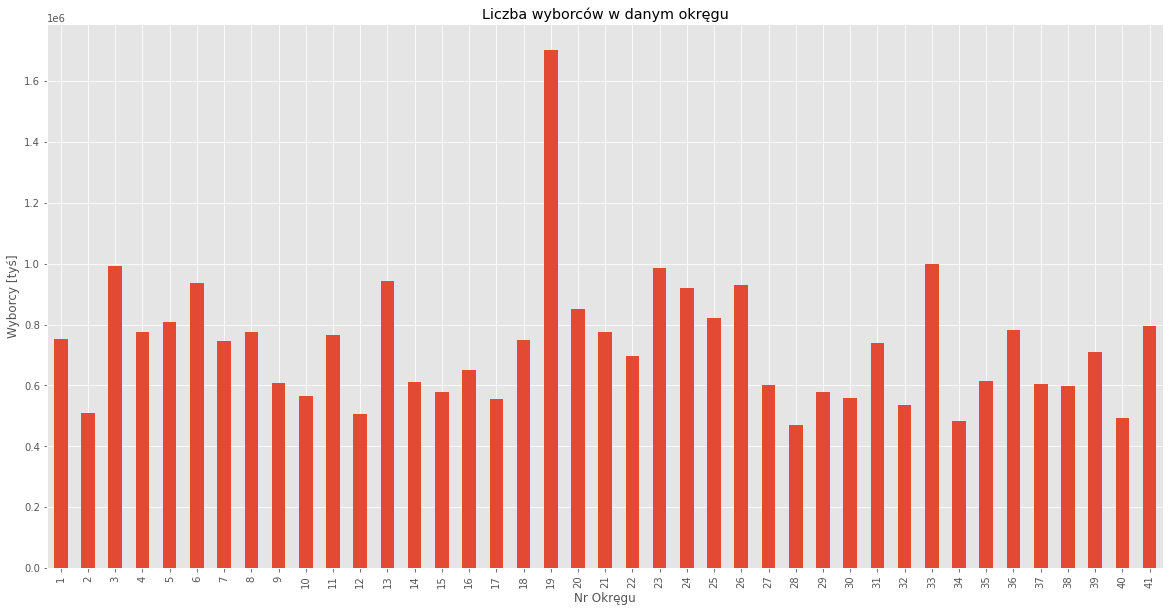

In [48]:
style.use('ggplot')
cir_vot.plot(kind = 'bar', legend = False, figsize =(20,10))
plt.title('Liczba wyborców w danym okręgu')
plt.ylabel('Wyborcy [tyś]')
plt.xlabel('Nr Okręgu')
plt.show()

In [26]:
df['Pozostali'] = df['Mieszkańcy']-df['Wyborcy']
df.columns

Index(['TERYT gminy', 'Gmina', 'Powiat', 'Numer', 'Mieszkańcy', 'Wyborcy',
       'Siedziba', 'Miejscowość', 'Ulica', 'Numer posesji', 'Numer lokalu',
       'Kod pocztowy', 'Poczta', 'Typ obwodu',
       'Przystosowany dla niepełnosprawnych', 'Typ obszaru', 'Pełna siedziba',
       'Opis granic', 'Numer okręgu do Sejmu', 'Numer okręgu do Senatu',
       'Pozostali'],
      dtype='object')

In [49]:
diet1=df[['Wyborcy', 'Pozostali' ,'Numer okręgu do Sejmu']].groupby(['Numer okręgu do Sejmu']).sum()
diet1.head()

,Wyborcy,Pozostali
Numer okręgu do Sejmu,,
1,752171,175279
2,509179,107202
3,993744,207589
4,776937,185819
5,806830,197382


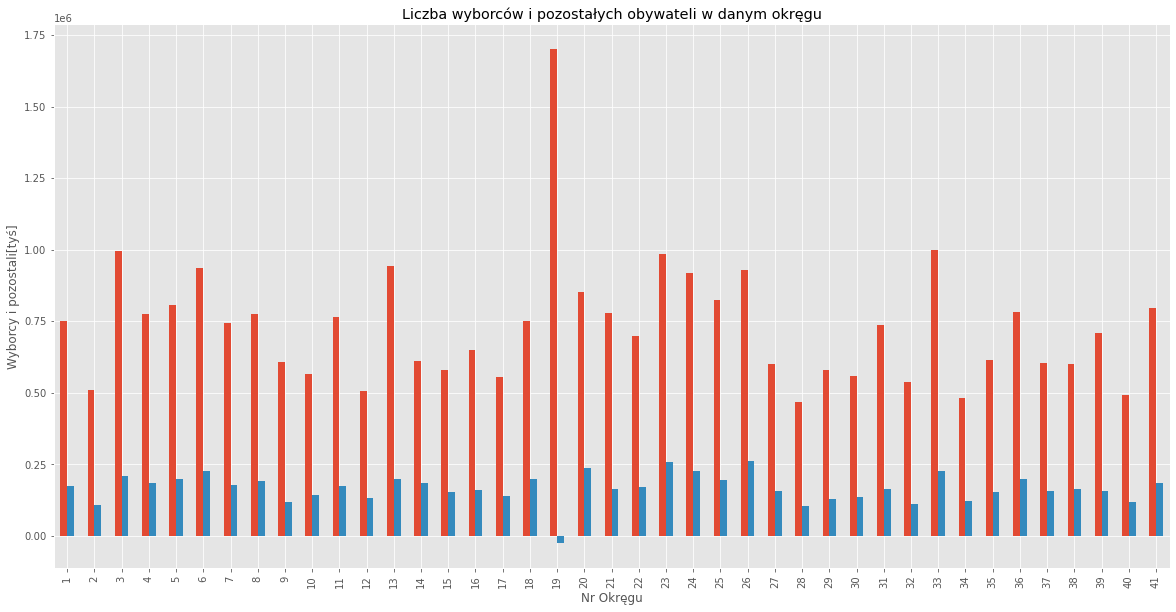

In [51]:
style.use('ggplot')
diet1.plot(kind = 'bar', legend = False, figsize =(20,10))
plt.title('Liczba wyborców i pozostałych obywateli w danym okręgu')
plt.ylabel('Wyborcy i pozostali[tyś]')
plt.xlabel('Nr Okręgu')
plt.show()

In [53]:
comm=df[['Gmina','Numer okręgu do Sejmu']]
comm=comm.drop_duplicates(['Gmina'])
comm19=comm[comm['Numer okręgu do Sejmu'] == 19]
comm19

,Gmina,Numer okręgu do Sejmu
13081,Bemowo,19
13131,Białołęka,19
13186,Bielany,19
13236,Mokotów,19
13335,Ochota,19
13382,Praga-Południe,19
13467,Praga-Północ,19
13498,Rembertów,19
13511,Śródmieście,19
13559,Targówek,19


In [54]:
#Ujemna liczba niebiorących udziału w wyborach wnika z wliczenia do okręgu numer 19 wyborców spoza granic Polski oraz głosujących na statkach. Liczba głosujących na statkach i za granicą przewyższyła liczbę niegłosujących obywateli. Rozwiązanie tego problemu:
add_19 = ship + abroad
cir_19 = cir_vot.loc[19]-add_19
print('Liczba wyborców w okręgu 19 wynosi: ' + str(cir_vot.loc[19]) + '. Dodatkowa liczba wyborców spoza granic oraz ze statków wliczona do okręgu 19: ' + str(add_19) + '. Liczba głosujących i mieszkających w obwodzie 19 wynosi: ' + str(cir_19))



Liczba wyborców w okręgu 19 wynosi: Wyborcy    1700686
Name: 19, dtype: int64. Dodatkowa liczba wyborców spoza granic oraz ze statków wliczona do okręgu 19: 331173. Liczba głosujących i mieszkających w obwodzie 19 wynosi: Wyborcy    1369513
Name: 19, dtype: int64


## Typy obszarów

In [31]:
no = len(pd.unique(df['Typ obszaru']))
print('Wyróznia się ' + str(no) + ' typów obszarów.')

Wyróznia się 5 typów obszarów.


In [55]:
ar_type = pd.unique(df['Typ obszaru'])
ar_type

array(['miasto', 'wieś', 'miasto i wieś', 'statek', 'zagranica'],
      dtype=object)

In [56]:
ar_type_vot=df[['Wyborcy','Typ obszaru']].groupby(['Typ obszaru']).sum()
ar_type_vot.head()

,Wyborcy
Typ obszaru,
miasto,17836364
miasto i wieś,97203
statek,145
wieś,11805863
zagranica,331028


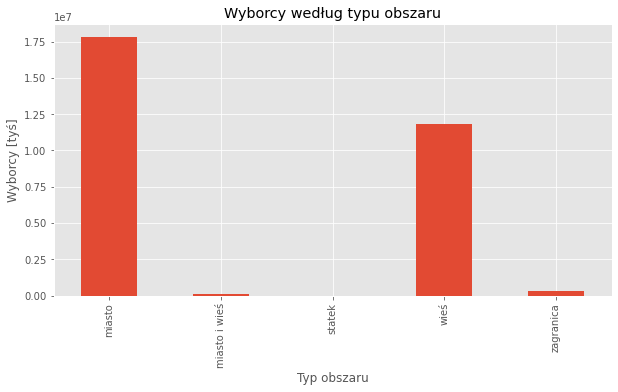

In [57]:
style.use('ggplot')
ar_type_vot.plot(kind = 'bar', legend = False, figsize =(10,5))
plt.title('Wyborcy według typu obszaru')
plt.ylabel('Wyborcy [tyś]')
plt.xlabel('Typ obszaru')
plt.show()

## Przystosowanie do ludzi z niepełnosprawnościami

In [58]:
disab = pd.unique(df['Przystosowany dla niepełnosprawnych'])
disab

array(['Nie', 'Tak'], dtype=object)

In [59]:
disab_vot=df[['Wyborcy','Przystosowany dla niepełnosprawnych']].groupby(['Przystosowany dla niepełnosprawnych']).sum()
disab_vot

,Wyborcy
Przystosowany dla niepełnosprawnych,
Nie,12637665
Tak,17432938


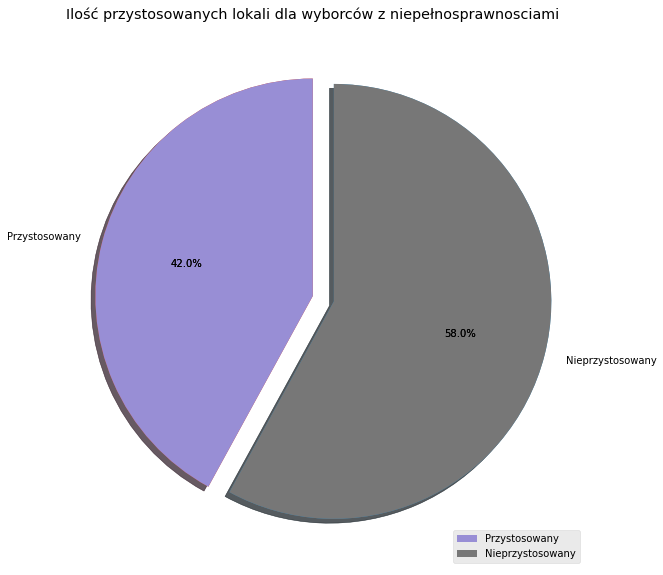

In [60]:
labels = ['Przystosowany', 'Nieprzystosowany']
sizes = disab_vot['Wyborcy']

fig1, ax1 = plt.subplots(figsize =(10,10))
explode = (0, 0.1) 
 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.title('Ilość przystosowanych lokali dla wyborców z niepełnosprawnosciami') 
plt.legend(patches, labels, loc='lower right')
plt.show()

In [61]:
ar_type_disab = pd.pivot_table(df, 'Wyborcy', ['Przystosowany dla niepełnosprawnych', 'Typ obszaru'], aggfunc=np.sum)
ar_type_disab

Wyborcy
Przystosowany dla niepełnosprawnych Typ obszaru            
Nie                                 miasto          7782094
                                    miasto i wieś     27259
                                    statek              145
                                    wieś            4497139
                                    zagranica        331028
Tak                                 miasto         10054270
                                    miasto i wieś     69944
                                    wieś            7308724